In [ ]:
import numpy as np
faces=np.load("/content/olivetti_faces.npy")
target=np.load("/content/olivetti_faces_target.npy")


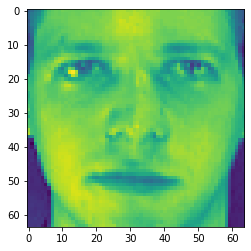

0


In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(faces[0])
plt.show()
print(target[0])

In [ ]:
from sklearn.model_selection import train_test_split
input_vectors=faces.reshape((faces.shape[0],faces.shape[1]*faces.shape[2]))
X_train, X_test, Y_train, Y_test=train_test_split(input_vectors,target,test_size=0.3,stratify=target,random_state=0)

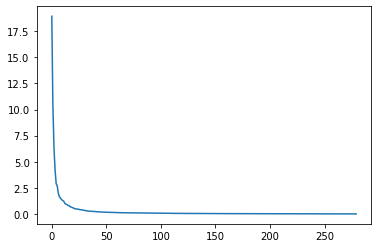

In [ ]:
from sklearn.decomposition import PCA
pca=PCA().fit(X_train)
plt.figure()
plt.plot(pca.explained_variance_)

In [ ]:
pca=PCA(n_components=50).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
clf=SVC()
clf.fit(X_train_pca,Y_train)
Y_pred=clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(accuracy_score(Y_test, Y_pred)))
print("The silhouette score is : {:.2f}".format(silhouette_score(X_test_pca,Y_pred)))

accuracy score:0.91
The silhouette score is : 0.12


33
33


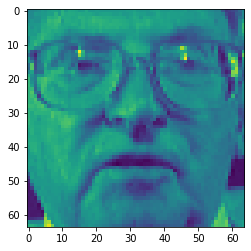

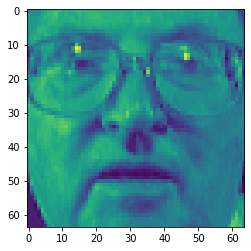

In [ ]:
plt.figure()
plt.imshow(X_test[2].reshape((64,64)))
print(Y_pred[2])
print(Y_test[2])
plt.figure()
plt.imshow(input_vectors[Y_pred[2]*10].reshape((64,64)))